In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import desc
from sqlalchemy import create_engine, inspect, func


In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Query All Records in the the Database

# Find most recent date for which we have data

end_date = engine.execute("SELECT MAX(date) FROM measurement").fetchall()
print(end_date)

#Calculate the start date (using dt module) 1 year ago from the last data point in the database

end_date_str = end_date[0][0]

print(end_date_str)

year = int(end_date_str[0:4])
#print(year)
month=int(end_date_str[5:7])
#print(month)
day=int(end_date_str[8:10])
#print(day)

start_date= dt.date(year=year, month=month, day=day) - dt.timedelta(days=364)
print("The starting date is " + str(start_date))


[('2017-08-23',)]
2017-08-23
The starting date is 2016-08-24


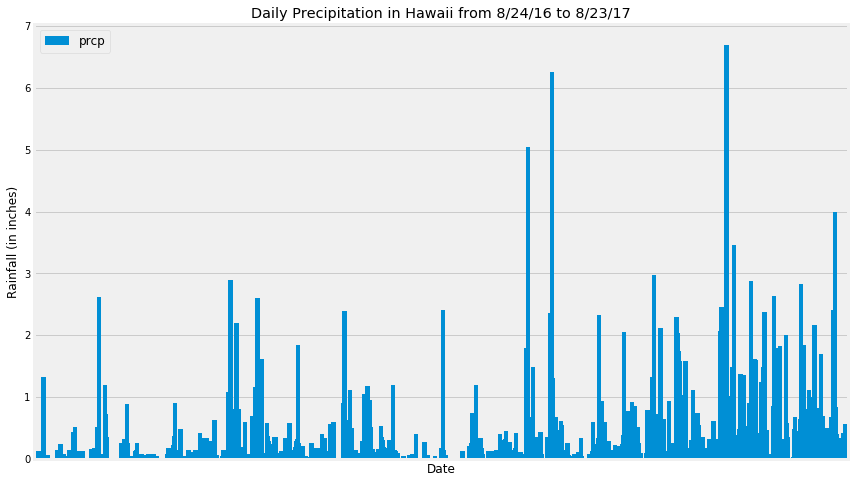

In [11]:
# Perform a query to retrieve the date and precipitation scores

prcp_results=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > start_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df=pd.DataFrame(prcp_results).set_index("date")

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot(kind="bar", figsize=(13,8), width=12, title="Daily Precipitation in Hawaii from 8/24/16 to 8/23/17")
legend = plt.legend(fontsize="large", mode="Expanded", loc="upper left")
    
plt.xticks([])
plt.xlabel("Date")
plt.ylabel("Rainfall (in inches)")

plt.savefig("Daily-Precipitation-Hawaii.png")
plt.show()


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_df.describe()

,prcp
count,2009.000000
mean,0.172344
std,0.452818
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?

stations=session.query(func.count(Station.station)).all()
#print(stations)
stations_str = str(stations[0][0])
print("The number of stations = " + stations_str)

The number of stations = 9


In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?

st_active=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all()

#st_active

# List the stations and the counts in descending order.

st_count = session.query(Measurement.station, func.count(Measurement.station))\
        .group_by(Measurement.station)\
        .order_by(func.count(Measurement.station).desc())

for stations in st_count:
    print(stations)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature for the most active station?

# Storing station name for the most active, which is the first station in the sorted list

st_active = st_count[0][0]

print("The most active station was "+ (st_active));

#Min temperature with corresponding date

st_min = (session.query(Measurement.date, func.min(Measurement.tobs))\
        .filter(Measurement.station == st_active).first())

for min_info in st_min:
    
    min_date = st_min[0]
    min_temp = st_min[1]
    
print("The minimum temperature was recorded on ", min_date,  "at", min_temp, "Fahrenheit.")

#Max temperature with corresponding date

st_max = (session.query(Measurement.date, func.max(Measurement.tobs))\
        .filter(Measurement.station == st_active).first())

for max_info in st_max:
    
    max_date = st_max[0]
    max_temp = st_max[1]
    
print("The maximum temperature was recorded on ", max_date, "at", max_temp, "Fahrenheit.")

#Avg temperature with corresponding date

st_avg = session.query(Measurement.date, func.avg(Measurement.tobs))\
        .filter(Measurement.station == st_active).first()

#print(st_avg)

for avg_info in st_avg:
    
    avg_date = st_avg[0]
    avg_temp = st_avg[1]

#st_avg_str = st_avg[0][0]

print("The average temperature was recorded on ", avg_date, "at", avg_temp, "Fahrenheit.")


#print("The average temperature was  " + "{:0.2f}".format(st_avg_str) + " degrees F.");


The most active station was USC00519281
The minimum temperature was recorded on  2013-01-16 at 54.0 Fahrenheit.
The maximum temperature was recorded on  2015-09-10 at 85.0 Fahrenheit.
The average temperature was recorded on  2010-01-01 at 71.66378066378067 Fahrenheit.


In [16]:
# Choose the station with the highest number of temperature observations.

st_temp=session.query(Measurement.station, func.count(Measurement.tobs))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.tobs).desc())

#for stations in st_temp:
    #print(stations)

st_temp_obs = st_temp[0][0]
print("The station with the highest number of temperature observations is "+ (st_temp_obs));


The station with the highest number of temperature observations is USC00519281


In [17]:
# Query the last 12 months of temperature observation data for this station

temp_data = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.station == st_temp_obs).all()

for obs in temp_data:
    print(obs)
 

('2010-01-01', 70.0)
('2010-01-02', 62.0)
('2010-01-03', 74.0)
('2010-01-04', 75.0)
('2010-01-05', 74.0)
('2010-01-06', 76.0)
('2010-01-07', 69.0)
('2010-01-08', 66.0)
('2010-01-09', 70.0)
('2010-01-10', 75.0)
('2010-01-11', 64.0)
('2010-01-12', 60.0)
('2010-01-13', 61.0)
('2010-01-14', 68.0)
('2010-01-15', 64.0)
('2010-01-16', 66.0)
('2010-01-17', 67.0)
('2010-01-18', 70.0)
('2010-01-19', 67.0)
('2010-01-20', 67.0)
('2010-01-21', 69.0)
('2010-01-22', 60.0)
('2010-01-23', 75.0)
('2010-01-24', 75.0)
('2010-01-25', 65.0)
('2010-01-26', 75.0)
('2010-01-27', 69.0)
('2010-01-28', 67.0)
('2010-01-29', 66.0)
('2010-01-30', 69.0)
('2010-01-31', 72.0)
('2010-02-01', 67.0)
('2010-02-02', 65.0)
('2010-02-03', 64.0)
('2010-02-04', 67.0)
('2010-02-05', 67.0)
('2010-02-06', 68.0)
('2010-02-07', 69.0)
('2010-02-08', 66.0)
('2010-02-09', 69.0)
('2010-02-10', 61.0)
('2010-02-11', 71.0)
('2010-02-12', 70.0)
('2010-02-13', 70.0)
('2010-02-14', 66.0)
('2010-02-15', 71.0)
('2010-02-16', 61.0)
('2010-02-17'

('2013-09-24', 74.0)
('2013-09-25', 71.0)
('2013-09-26', 72.0)
('2013-09-27', 72.0)
('2013-09-28', 79.0)
('2013-09-29', 75.0)
('2013-09-30', 67.0)
('2013-10-01', 74.0)
('2013-10-02', 73.0)
('2013-10-03', 78.0)
('2013-10-04', 76.0)
('2013-10-05', 74.0)
('2013-10-06', 71.0)
('2013-10-07', 73.0)
('2013-10-08', 71.0)
('2013-10-09', 75.0)
('2013-10-10', 72.0)
('2013-10-11', 71.0)
('2013-10-12', 70.0)
('2013-10-13', 70.0)
('2013-10-14', 70.0)
('2013-10-15', 70.0)
('2013-10-16', 71.0)
('2013-10-17', 71.0)
('2013-10-18', 67.0)
('2013-10-19', 65.0)
('2013-10-20', 68.0)
('2013-10-21', 66.0)
('2013-10-22', 66.0)
('2013-10-23', 69.0)
('2013-10-24', 71.0)
('2013-10-25', 69.0)
('2013-10-26', 70.0)
('2013-10-27', 81.0)
('2013-10-28', 70.0)
('2013-10-29', 75.0)
('2013-10-30', 68.0)
('2013-10-31', 76.0)
('2013-11-01', 76.0)
('2013-11-02', 76.0)
('2013-11-03', 78.0)
('2013-11-04', 69.0)
('2013-11-05', 70.0)
('2013-11-06', 70.0)
('2013-11-07', 67.0)
('2013-11-08', 70.0)
('2013-11-09', 74.0)
('2013-11-10'

('2016-06-21', 72.0)
('2016-06-22', 75.0)
('2016-06-23', 73.0)
('2016-06-24', 76.0)
('2016-06-25', 74.0)
('2016-06-26', 77.0)
('2016-06-27', 72.0)
('2016-06-28', 71.0)
('2016-06-29', 76.0)
('2016-06-30', 77.0)
('2016-07-01', 76.0)
('2016-07-02', 79.0)
('2016-07-03', 76.0)
('2016-07-04', 79.0)
('2016-07-05', 75.0)
('2016-07-06', 74.0)
('2016-07-07', 73.0)
('2016-07-08', 78.0)
('2016-07-09', 80.0)
('2016-07-10', 72.0)
('2016-07-11', 79.0)
('2016-07-12', 80.0)
('2016-07-13', 76.0)
('2016-07-14', 80.0)
('2016-07-15', 80.0)
('2016-07-16', 73.0)
('2016-07-17', 77.0)
('2016-07-18', 78.0)
('2016-07-19', 79.0)
('2016-07-20', 80.0)
('2016-07-21', 79.0)
('2016-07-22', 78.0)
('2016-07-23', 75.0)
('2016-07-24', 76.0)
('2016-07-25', 78.0)
('2016-07-26', 78.0)
('2016-07-27', 80.0)
('2016-07-28', 81.0)
('2016-07-29', 80.0)
('2016-07-30', 77.0)
('2016-07-31', 75.0)
('2016-08-01', 76.0)
('2016-08-02', 76.0)
('2016-08-03', 77.0)
('2016-08-04', 77.0)
('2016-08-05', 81.0)
('2016-08-06', 78.0)
('2016-08-07'

<function matplotlib.pyplot.show(*args, **kw)>

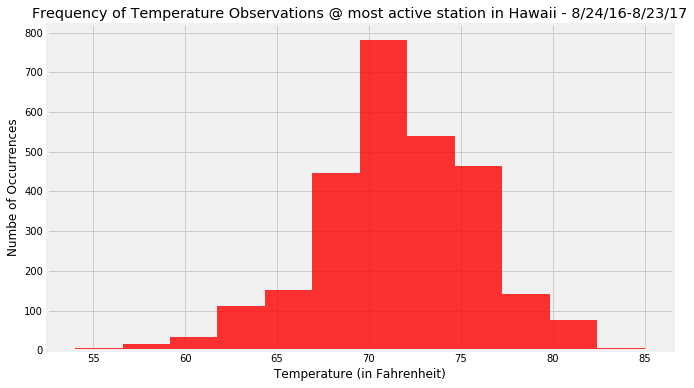

In [18]:
#Plot the results as a histogram

temp_obs = session.query(Measurement.tobs)\
    .filter(Measurement.station == st_temp_obs).all()

#for obs in temp_obs:
    #print(obs)

temp_df=pd.DataFrame(temp_obs)

#temp_df

temp_df.plot(kind="hist", bins=12, legend=False, color="red", alpha=0.8, figsize=(10,6),
             title="Frequency of Temperature Observations @ most active station in Hawaii - 8/24/16-8/23/17")

plt.xlabel('Temperature (in Fahrenheit)')
plt.ylabel('Numbe of Occurrences')

plt.show


## Optional Challenge Assignment

In [19]:
#The following are optional challenge queries. These are highly recommended to attempt, 
#but not required for the homework.

#Temperature Analysis

# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example

print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [20]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

#session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
    #filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# My trip will take place from August 6-18, 2019. There is no 2018 data. So lets use 2017 info instead.

results = (calc_temps('2017-08-06', '2017-08-18'))

#print(results)

for result in results:
    tmin = result[0]
    tavg = result[1]
    tmax = result[2]

print("The minimum expected temperature for my trip is " + str(tmin) + " F.")
print("The average expected temperature for my trip is " + "{:0.1f}".format(tavg) + " F.")
print("The maximum expected temperature for my trip is " + str(tmax) + " F.")


The minimum expected temperature for my trip is 70.0 F.
The average expected temperature for my trip is 78.7 F.
The maximum expected temperature for my trip is 84.0 F.


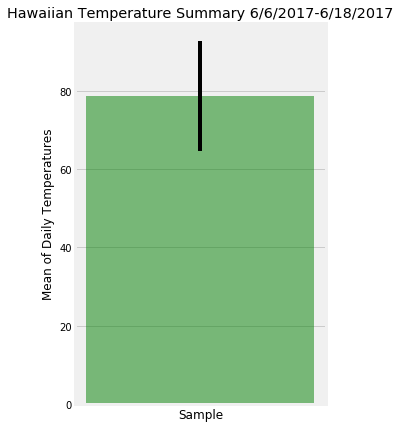

<Figure size 432x288 with 0 Axes>

In [21]:
#Plot the min, avg, and max temperature from your previous query as a bar chart.

#Use the average temperature as the bar height.

#Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

height = tavg
yerr = tmax -tmin

fig, ax = plt.subplots(figsize=(4,7))
bar=ax.bar(x=1, height=height, yerr=yerr, color="green", alpha=0.5)

ax.set_xticks([])
ax.set_title("Hawaiian Temperature Summary 6/6/2017-6/18/2017")
ax.set_xlabel("Sample")
ax.set_ylabel("Mean of Daily Temperatures")

plt.show()

plt.savefig("Images/Trip-Avg Temp.png")


In [22]:
#Daily Rainfall Average.

# Calculate the total rainfall per weather station for your trip dates using the previous year's matching dates.

start_date = "2017-08-06"
end_date = "2017-08-18"

st_rain = session.query(Measurement.station, func.sum(Measurement.prcp))\
    .filter((Measurement.date >= start_date) & (Measurement.date <= end_date))\
    .group_by(Measurement.station).all()
    
#st_rain

#Sort this in descending order by precipitation amount.

st_rain_sort = session.query(Measurement.station, func.sum(Measurement.prcp))\
    .filter((Measurement.date >= start_date) & (Measurement.date <= end_date))\
    .group_by(Measurement.station)\
    .order_by(func.sum(Measurement.prcp).desc())

for stations in st_rain_sort:     
      print(stations)
        

('USC00516128', 1.94)
('USC00519281', 0.51)
('USC00519523', 0.26)
('USC00514830', 0.11)
('USC00519397', 0.02)


In [23]:
#Calculate the daily normals. Normals are the averages for the min, avg, and max temperatures.

#You are provided with a function called daily_normals that will calculate the daily normals for a specific date. 
#This date string will be in the format %m-%d. Be sure to use all historic tobs that match that date string.

# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [81]:
# Calculate the daily normals for your trip

import datetime

# Use the start and end date to create a range of dates

start_date = "2019-08-06"
end_date = "2019-08-18"

 # Strip off the year and save a list of %m-%d strings

date_range = [datetime.datetime.strptime(start_date, '%Y-%m-%d').strftime('%m-%d')
              ,datetime.datetime.strptime(end_date, '%Y-%m-%d').strftime('%m-%d')]

# print(date_range)

# Create a function called daily_normals that will calculate the daily normals for a specific date

sel = [func.strftime("%m-%d", Measurement.date), func.min(Measurement.tobs), func.avg(Measurement.tobs), 
       func.max(Measurement.tobs)]
ret = session.query(*sel).filter(func.strftime("%m-%d", Measurement.date)>= date_range[0])\
.filter(func.strftime("%m-%d", Measurement.date) <= date_range[1])\
.group_by(func.strftime("%m-%d", Measurement.date)).all()

# print(ret)

def daily_normals(start_date,end_date):
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    ret = session.query(*sel).filter(func.strftime("%m-%d", Measurement.date)>= start_date)\
    .filter(func.strftime("%m-%d", Measurement.date) <= end_date).all()
    
    return ret

# Pust each tuple into a list called #`normals`

normals_list = ret

# Calculate the normals for each date and append the results to a list.
                   
normals_list

[('08-06', 67.0, 76.25, 83.0),
 ('08-07', 71.0, 77.15686274509804, 83.0),
 ('08-08', 68.0, 76.5576923076923, 83.0),
 ('08-09', 69.0, 75.98039215686275, 81.0),
 ('08-10', 65.0, 76.42, 83.0),
 ('08-11', 67.0, 75.98113207547169, 82.0),
 ('08-12', 67.0, 76.52727272727273, 83.0),
 ('08-13', 71.0, 76.98245614035088, 84.0),
 ('08-14', 71.0, 76.77777777777777, 82.0),
 ('08-15', 69.0, 76.47169811320755, 83.0),
 ('08-16', 69.0, 76.08, 83.0),
 ('08-17', 69.0, 76.125, 83.0),
 ('08-18', 70.0, 76.92307692307692, 84.0)]

In [79]:
# Load the previous query results into a Pandas DataFrame 

trip_df = pd.DataFrame(normals_list, columns = ["date", "tmin", "tavg", "tmax"])

# Set the index equal to the date.

trip_df = trip_df.set_index("date")
trip_df

,tmin,tavg,tmax
date,,,
08-06,67.0,76.250000,83.0
08-07,71.0,77.156863,83.0
08-08,68.0,76.557692,83.0
08-09,69.0,75.980392,81.0
08-10,65.0,76.420000,83.0
08-11,67.0,75.981132,82.0
08-12,67.0,76.527273,83.0
08-13,71.0,76.982456,84.0
08-14,71.0,76.777778,82.0


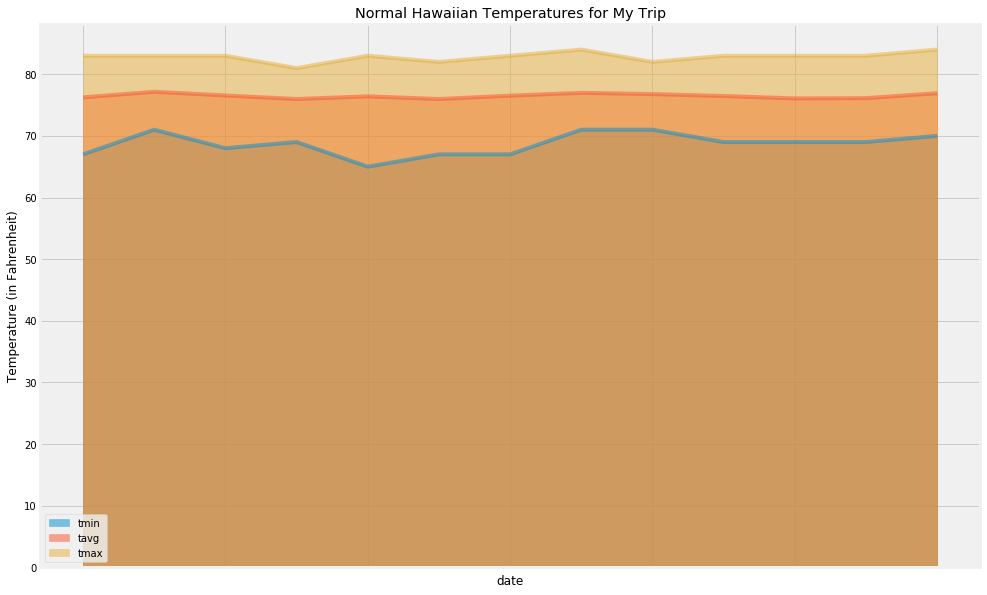

In [80]:
# Plot the daily normals as an area plot with `stacked=False`
# Use Pandas to plot an area plot (stacked=False) for the daily normals.

trip_df.plot(kind="area", stacked=False, figsize=(15, 10), title="Normal Hawaiian Temperatures for My Trip")

plt.ylabel("Temperature (in Fahrenheit)")

plt.show()